## Moving Average (MA) and ARMA Models - Chapter 4

Source : Datacamp

In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (10, 5)
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf
from math import sqrt
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima.model import ARIMA
import datetime

### Describe Model
- Mathemetical Description of MA(1) Model
$$ R_t = \mu + \epsilon_t + \theta \epsilon_{t-1} $$
    - Since only one lagged error on right hand side, this is called MA model of order 1, or MA(1) model
- Interpretation of MA(1) Parameter
    - Negative $\theta$: One-Period Mean Reversion
    - Positive $\theta$: One-Period Momentum
    - Note: One-Period autocorrelation is $\frac{\theta}{1+ \theta^2}$, note $\theta$
- High Order MA Models
    - MA(1)
$$ R_t = \mu + \epsilon_t - \theta_1 \epsilon_{t-1}$$
    - MA(2)
$$ R_t = \mu + \epsilon_t - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} $$
    - MA(3)
$$ R_t = \mu + \epsilon_t - \theta_1 \epsilon_{t-1} - \theta_2 \epsilon_{t-2} - \theta_3 \epsilon_{t-3}$$
    - $\cdots$
    
    

In a Moving Average, or MA model, today's value equals a mean plus noise, plus a fraction theta of yesterday's noise. Since there is only one lagged error on the right hand side, this is called an MA model of order 1, or simply an MA(1) model. If the MA parameter, theta, is zero, then the process is white noise. MA models are stationary for all values of theta.   

 When theta is positive, the lag-1 autocorrelation is positive and when theta is negative, the lag-1 autocorrelation is negative.
 
 

####  1 A: Simulate MA(1) Time Series

You will simulate and plot a few MA(1) time series, each with a different parameter, θ, using the ```arima_process``` module in statsmodels, just as you did in the last chapter for AR(1) models. You will look at an MA(1) model with a large positive θ and a large negative θ.

As in the last chapter, when inputting the coefficients, you must include the zero-lag coefficient of 1, but unlike the last chapter on AR models, the sign of the MA coefficients is what we would expect. For example, for an MA(1) process with $\theta = -0.9$, the array representing the MA parameters would be ```ma = np.array([1, -0.9])```.

 - Import the class ArmaProcess in the arima_process module.
 - Plot the simulated MA(1) processes
 - Let ma1 represent an array of the MA parameters [1, ] as explained above. The AR parameter array will contain just the lag-zero coefficient of one.
 - With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called MA_object1.
 - Simulate 1000 data points from the object you just created, MA_object1, using the method .generate_sample(). Plot the simulated data in a subplot.
 - Repeat for the other MA parameter.

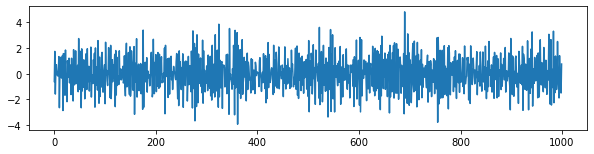

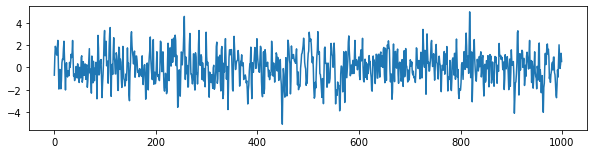

In [44]:
# Import the class ArmaProcess in the arima_process module.
from statsmodels.tsa.arima_process import ArmaProcess

# Plot the simulated MA(1) processes
plt.subplot(2, 1, 1)

# Let ma1 represent an array of the MA parameters [1, ] as explained above.
   #The AR parameter array will contain just the lag-zero coefficient of one.
    
# Plot 1: MA parameter = -0.9
ar1 = np.array([1])
ma1 = np.array([1, -0.9])

# With parameters ar1 and ma1, create an instance of the class ArmaProcess(ar,ma) called MA_object1.
MA_object1 = ArmaProcess(ar1, ma1)

# Simulate 1000 data points from the object you just created, MA_object1, using the method .generate_sample().
   #Plot the simulated data in a subplot.
simulated_data_1 = MA_object1.generate_sample(nsample=1000) 
plt.plot(simulated_data_1);
plt.show()
# Repeat for the other MA parameter.


# Plot 2: MA parameter = +0.9
plt.subplot(2,1,2)
ar2 = np.array([1])
ma2 = np.array([1, 0.9])
MA_object2 = ArmaProcess(ar2, ma2)
simulated_data_2 = MA_object2.generate_sample(nsample=1000)
plt.plot(simulated_data_2)

plt.show()

note: The two MA parameters produce different time series plots, but in the next exercise you'll really be able to distinguish the time series.

# 1 B:  Compute the ACF for Several MA Time Series
Unlike an AR(1), an MA(1) model has no autocorrelation beyond lag 1, an MA(2) model has no autocorrelation beyond lag 2, etc. The lag-1 autocorrelation for an MA(1) model is not $\theta$, but rather $\frac{\theta}{1+\theta^2}$. For example, if the MA parameter, $\theta$, is = +0.9, the first-lag autocorrelation will be $\frac{0.9}{1 + (0.9)^2} = 0.497$, and the autocorrelation at all other lags will be zero. If the MA parameter, $\theta$, is -0.9, the first-lag autocorrelation will be $\frac{-0.9}{1 + (-0.9)^2}$ = -0.497.

You will verify these autocorrelation functions for the three time series you generated in the last exercise.

 - simulated_data_1 is the first simulated time series with an MA parameter of $\theta$ = -0.9.
 - Compute the autocorrelation function of simulated_data_1 using the plot_acf function with 20 lags.

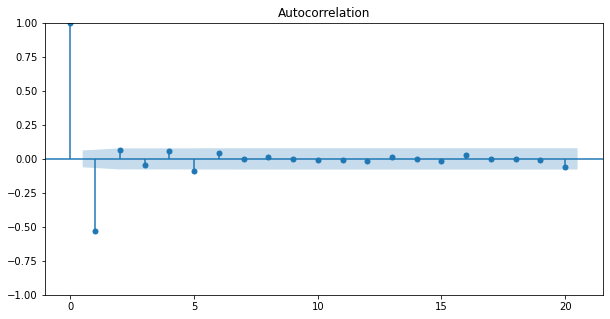

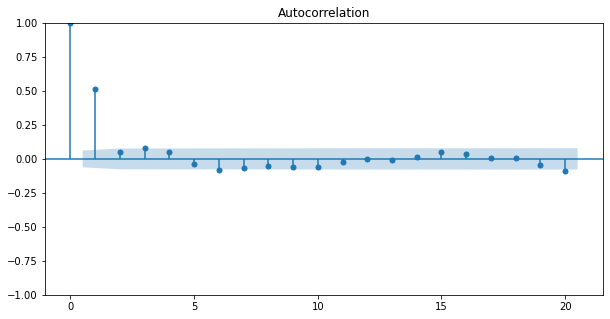

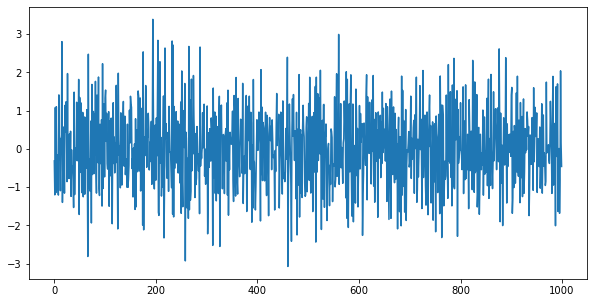

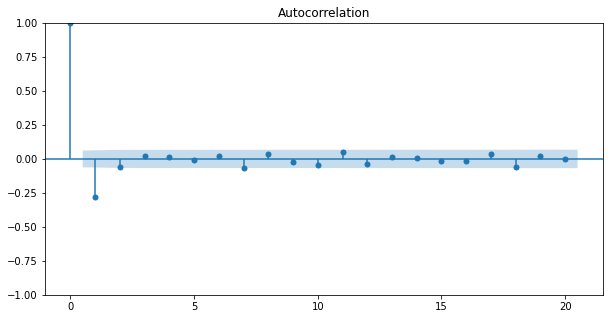

In [45]:
# simulated_data_1 is the first simulated time series with an MA parameter of 𝜃  = -0.9.

#  Compute the autocorrelation function of simulated_data_1 using the plot_acf function with 20 lags.
plot_acf(simulated_data_1, lags=20)
plt.show()

# simulated_data_2 is the second simulated time series with an MA parameter of 𝜃  = 0.9.
# Compute the autocorrelation function using the plot_acf function with lags=20.
plot_acf(simulated_data_2, lags=20)
plt.show()


# simulated_data_3 is the third simulated time series with an MA parameter of 𝜃  = -0.3.
# Compute the autocorrelation function using the plot_acf() function with 20 lags.
ar3 = np.array([1])
ma3 = np.array([1, -0.3])
MA_object3 = ArmaProcess(ar3, ma3)
simulated_data_3 = MA_object3.generate_sample(nsample= 1000)
plt.plot(simulated_data_3)

plt.show()

plot_acf(simulated_data_3, lags=20)
plt.show()

### 2 : Estimation and Forecasting an MA Model

The same module that you used to estimate the parameters of an AR model can be used to estimate the parameters of an MA model. Import the class ARMA as before, and create an instance of that class called mod, with the arguments being the data that you're trying to fit, and the order of the model. However, now the order is (0,1), for an MA(1), not (1,0) for an AR(1). And as before with an AR model, once you instantiate the class, you can use the method fit to estimate the model, and store the results in result.

 - Forecasting an MA Model
 
The procedure for forecasting an MA model is the same as that for an AR model: you again create an instance of the class using ARMA, and you use the fit method to *estimate* the parameters. Of course, to estimate an MA model, set the order to (0,1), then use the method plot_predict to do forecasting as you did for forecasting an AR model. One thing to note is that with an MA(1) model, unlike an AR model, all forecasts beyond the one-step ahead forecast will be the same.

#### 2 A:  Estimating an MA Model
You will estimate the MA(1) parameter, $\theta$, of one of the simulated series that you generated in the earlier exercise. Since the parameters are known for a simulated series, it is a good way to understand the estimation routines before applying it to real data.

For simulated_data_1 with a true $\theta$ of -0.9, you will print out the estimate of $\theta$. In addition, you will also print out the entire output that is produced when you fit a time series, so you can get an idea of what other tests and summary statistics are available in statsmodels.

 - Import the class ARMA in the module statsmodels.tsa.arima_model.
 - Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) of the model (in this case, for an MA(1)), is order=(0,1).
 - Fit the model mod using the method .fit() and save it in a results object called res.
 - Print out the entire summary of results using the .summary() method.
 - Just print out an estimate of the constant and theta parameter using the .params attribute (no arguments).

In [46]:
# Import the class ARMA in the module statsmodels.tsa.arima_model.
from statsmodels.tsa.arima.model import ARIMA

# Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the order (p,q) 
  # of the model (in this case, for an MA(1)), is order=(0,1).
mod = ARIMA(simulated_data_1, order=(0, 1, 1))
    
# Fit the model mod using the method .fit() and save it in a results object called res.
res = mod.fit()

# Print out the entire summary of results using the .summary() method.
print(res.summary())

# Just print out an estimate of the constant and theta parameter using the .params attribute (no arguments).
# Print out the estimate for the constant and for theta
print("When the true theta=-0.9, the estimate of theta (and the constant) are:")
print(res.params)

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1000
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1736.521
Date:                Thu, 13 Jan 2022   AIC                           3477.043
Time:                        09:02:17   BIC                           3486.856
Sample:                             0   HQIC                          3480.773
                               - 1000                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9996      0.120     -8.304      0.000      -1.236      -0.764
sigma2         1.8815      0.239      7.873      0.000       1.413       2.350
Ljung-Box (L1) (Q):                 282.40   Jarque-

note: Notice how close the estimated parameter is to the true parameter.

#### 2 B:  Forecasting with MA Model
As you did with AR models, you will use MA models to forecast in-sample and out-of-sample data using statsmodels.

For the simulated series simulated_data_1 with   𝜃  = -0.9, you will plot in-sample and out-of-sample forecasts. One big difference you will see between out-of-sample forecasts with an MA(1) model and an AR(1) model is that the MA(1) forecasts more than one period in the future are simply the mean of the sample.

 - Import the class ARMA in the module statsmodels.tsa.arima_model
 - Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the (p,q) order of the model (in this case, for an MA(1), order=(0,1)
 - Fit the model mod using the method .fit() and save it in a results object called res
 - Plot the in-sample and out-of-sample forecasts of the data using the .plot_predict() method
 - Start the forecast 10 data points before the end of the 1000 point series at 990, and end the forecast 10 data points after the end of the series at point 1010

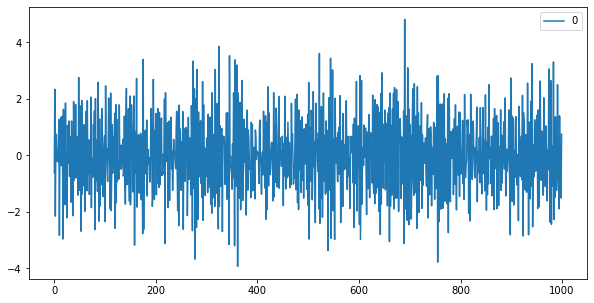

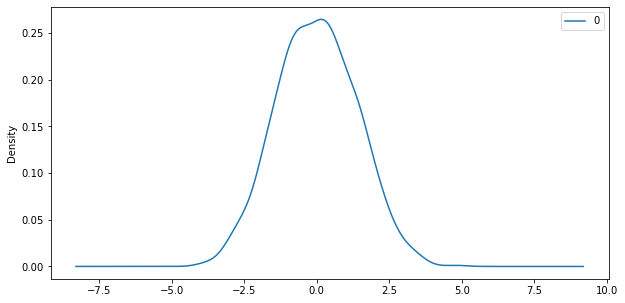

                 0
count  1000.000000
mean      0.001842
std       1.376425
min      -3.931507
25%      -0.975870
50%       0.007253
75%       0.959908
max       4.815958


In [47]:
from pandas import DataFrame
from matplotlib import pyplot
# Import the class ARMA in the module statsmodels.tsa.arima_model
# Create an instance of the ARMA class called mod using the simulated data simulated_data_1 and the (p,q)
       #order of the model (in this case, for an MA(1), order=(0,1)
mod = ARIMA(simulated_data_1, order=(0, 1, 1)) 

# Fit the model mod using the method .fit() and save it in a results object called res
res = mod.fit()

# Plot the in-sample and out-of-sample forecasts of the data using the .plot_predict() method


# Start the forecast 10 data points before the end of the 1000 point series at 990, and end the forecast 10 data points
                    #after the end of the series at point 1010

# line plot of residuals
residuals = DataFrame(res.resid)
residuals.plot()
pyplot.show()
# density plot of residuals
residuals.plot(kind='kde')
pyplot.show()
# summary stats of residuals
print(residuals.describe())   

![](img16.png)

#### 3:  ARMA models
An ARMA model is a combination of an AR and MA model.

 - Converting Between ARMA, AR, and MA Models
 
ARMA models can be converted to pure AR or pure MA models. Here is an example of converting an AR(1) model into and MA(infinity) model. The first line is an AR(1) model. Then, in the second line, the AR(1) equation is substituted for R t-1. You do the same for R t-2 in the third line, etc., and you eventually end up with an MA(infinity) model with coefficients phi, phi squared, phi cubed, etc

#### 3 A: High Frequency Stock Prices

Higher frequency stock data is well modeled by an MA(1) process, so it's a nice application of the models in this chapter.

The DataFrame intraday contains one day's prices (on September 1, 2017) for Sprint stock (ticker symbol "S") sampled at a frequency of one minute. The stock market is open for 6.5 hours (390 minutes), from 9:30am to 4:00pm.

Before you can analyze the time series data, you will have to clean it up a little, which you will do in this and the next two exercises. When you look at the first few rows (see the IPython Shell), you'll notice several things. First, there are no column headers.The data is not time stamped from 9:30 to 4:00, but rather goes from 0 to 390. And you will notice that the first date is the odd-looking "a1504272600". The number after the "a" is Unix time which is the number of seconds since January 1, 1970. This is how this dataset separates each day of intraday data.

If you look at the data types, you'll notice that the DATE column is an object, which here means a string. You will need to change that to numeric before you can clean up some missing data.

The source of the minute data is Google Finance (see here on how the data was downloaded).

The datetime module has already been imported for you.

  -  getting the data in a format that we can work with.

In [48]:
intraday = pd.read_csv('./dataset/Sprint_Intraday.txt', header=None)
intraday = intraday.loc[:, :1]
intraday.head()

,0,1
0,a1504272600,8.2900
1,1,8.2700
2,2,8.2800
3,3,8.2750
4,4,8.2875


In [49]:
# Change the first date to zero
intraday.iloc[0, 0] = 0

# Change the column headers to 'DATE' and 'CLOSE'
intraday.columns = ['DATE', 'CLOSE']

# Examine the data types for each column
print(intraday.dtypes)

# Convert DATE column to numeric
intraday['DATE'] = pd.to_numeric(intraday['DATE'])

# Make the 'DATE' column the new index
intraday = intraday.set_index('DATE')

DATE      object
CLOSE    float64
dtype: object


#### 3 B:  More Data Cleaning: Missing Data

When you print out the length of the DataFrame intraday, you will notice that a few rows are missing. There will be missing data if there are no trades in a particular one-minute interval. One way to see which rows are missing is to take the difference of two sets: the full set of every minute and the set of the DataFrame index which contains missing rows. After filling in the missing rows, you can convert the index to time of day and then plot the data.

Stocks trade at discrete one-cent increments (although a small percentage of trades occur in between the one-cent increments) rather than at continuous prices, and when you plot the data you should observe that there are long periods when the stock bounces back and forth over a one cent range. This is sometimes referred to as "bid/ask bounce".

In [50]:
#Print out the length of intraday using len().
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))
len(intraday)

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389


389

If there were no missing rows, there would be 391 rows of minute data
The actual length of the DataFrame is: 389
Missing rows:  {182, 14}


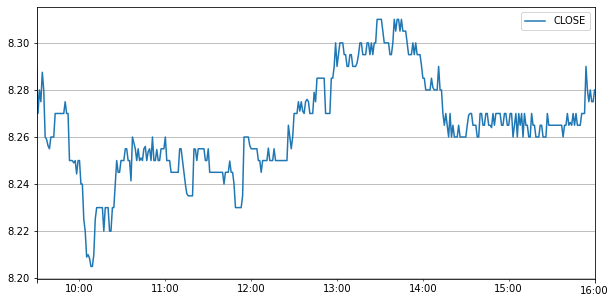

In [51]:
# Notice that some rows are missing
print("If there were no missing rows, there would be 391 rows of minute data")
print("The actual length of the DataFrame is:", len(intraday))

# Everything
set_everything = set(range(391))

# The intraday index as a set
set_intraday = set(intraday.index)

# Calculate the difference
set_missing = set_everything - set_intraday

# Print the difference
print("Missing rows: ", set_missing)

# Fill in the missing rows
intraday = intraday.reindex(range(391), method='ffill')

# Change the index to the intraday times
intraday.index = pd.date_range(start='2017-09-01 9:30', end='2017-09-01 16:00', freq='1min')

# Plot the intraday time series
intraday.plot(grid=True);

 note: Missing data is common with high frequency financial time series,

#### 3 C:  Applying an MA Model

The bouncing of the stock price between bid and ask induces a negative first order autocorrelation, but no autocorrelations at lags higher than 1. You get the same ACF pattern with an MA(1) model. Therefore, you will fit an MA(1) model to the intraday stock data from the last exercise.

The first step is to compute minute-by-minute returns from the prices in intraday, and plot the autocorrelation function. You should observe that the ACF looks like that for an MA(1) process. Then, fit the data to an MA(1), the same way you did for simulated data.

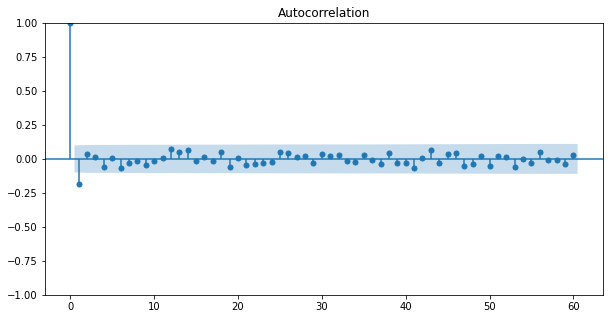

const    -6.832078e-06
ma.L1    -1.717162e-01
sigma2    4.150534e-07
dtype: float64


In [62]:
# Import plot_acf and ARMA modules from statsmodels
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima.model import ARIMA

     # Compute minute-to-minute returns from prices:
     # Compute returns with the .pct_change() method
     # Use the pandas method .dropna() to drop the first row of returns, which is NaN
returns = intraday.pct_change()
returns = returns.dropna()

# Plot the ACF function with lags up to 60 minutes
plot_acf(returns, lags=60);
plt.show()

# Fit the returns data to an MA(1) model and print out the MA(1) parameter
mod = ARIMA(returns, order=(0, 0, 1))
res = mod.fit()
print(res.params)

note: Notice the significant negative lag-1 autocorrelation, just like for an MA(1) model.

#### Equivalence of AR(1) and MA($\infty$)

To better understand the relationship between MA models and AR models, you will demonstrate that an AR(1) model is equivalent to an MA($\infty$) model with the appropriate parameters.

You will simulate an MA model with parameters $0.8,0.8^2,0.8^3,\cdots$ for a large number (30) lags and show that it has the same Autocorrelation Function as an AR(1) model with $\phi=0.8$.

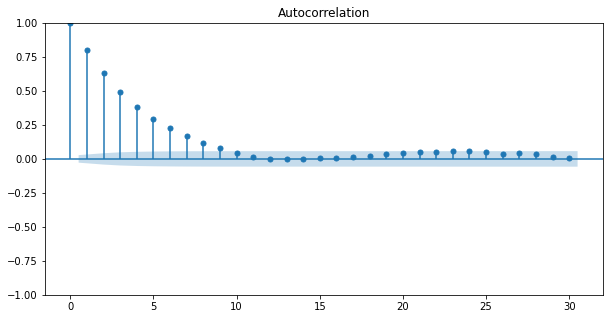

In [67]:
# Import the modules for simulating data and plotting the ACF from statsmodels
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.graphics.tsaplots import plot_acf

# Use a list comprehension to build a list with exponentially decaying MA parameters:
ma = [0.8 ** i for i in range(30)]

# Simulate 5000 observations of the MA(30) model
ar = np.array([1])
AR_object = ArmaProcess(ar, ma)
simulated_data = AR_object.generate_sample(nsample=5000)

# Plot the ACF of the simulated series
plot_acf(simulated_data, lags=30)
plt.show()

Code: Notice that the ACF looks the same as an AR(1) with parameter 0.8